In [76]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm, font_manager, rc
import numpy as np
import seaborn as sns

In [77]:
font_path = "../data/THEdog.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

In [19]:
def rate(a, b):
    return a / b * 100

cctv = pd.read_csv('../data/cctv_seoul.csv')
cctv['CCTV비율'] = cctv.apply(lambda x: rate(x['CCTV수'], x['인구수']), axis=1)
cctv['노인비율'] = cctv.apply(lambda x: rate(x['고령자'], x['인구수']), axis=1)
cctv.head()

,구별,CCTV수,인구수,한국인,외국인,고령자,CCTV비율,노인비율
0,강남구,2780,570500.0,565550.0,4950.0,63167.0,0.487292,11.072217
1,강동구,773,453233.0,449019.0,4214.0,54622.0,0.170552,12.051638
2,강북구,748,330192.0,326686.0,3506.0,54813.0,0.226535,16.600342
3,강서구,884,603772.0,597248.0,6524.0,72548.0,0.146413,12.015794
4,관악구,1496,525515.0,507203.0,18312.0,68082.0,0.284673,12.955291


In [33]:
click = pd.read_csv('../data/product_click.log', header=None, sep=' ', dtype=str)
click.columns=['date', 'pid']
click.head()

,date,pid
0,201612120944,p001
1,201612120944,p003
2,201612120944,p003
3,201612120945,p008
4,201612121052,p008


Text(0, 0.5, '클릭횟수')

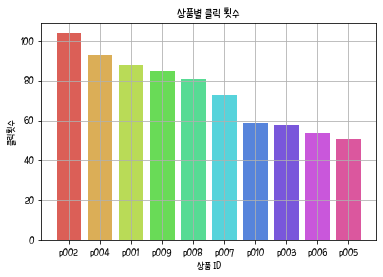

In [83]:
click_count = click.groupby(['pid']).count()
click_count.columns = ['count']
click_count.sort_values(by='count', ascending=False, inplace=True)

mycolors = sns.color_palette('hls', len(click_count))

plt.bar(click_count.index, click_count['count'], color=mycolors)
plt.grid(True)
plt.title('상품별 클릭 횟수')
plt.xlabel('상품 ID')
plt.ylabel('클릭횟수')

In [113]:
click.date = pd.to_datetime(click.date)
click_wd = click.copy()
click_wd['wd'] = click_wd.date.dt.dayofweek
wd = click_wd.groupby(['wd']).count().idxmax().values[0]
day = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
print('클릭 수가 제일 많은 요일은 ' + day[wd] + '입니다.')

클릭 수가 제일 많은 요일은 목요일입니다.


In [132]:
emp = pd.read_csv('../data/emp.csv')

emp1 = emp[['deptno', 'sal']]
emp1.groupby(['deptno']).sum('sal')

,sal
deptno,
10,8750
20,10875
30,9400


In [133]:
emp2 = emp[['job', 'sal']]
emp2.groupby(['job']).sum('')

,sal
job,
ANALYST,6000
CLERK,4150
MANAGER,8275
PRESIDENT,5000
SALESMAN,5600


In [150]:
emp3 = emp[['job', 'hiredate', 'sal', 'deptno']]
columns = list(reversed(emp3.columns.values))
emp3 = emp3[columns]
emp3
emp3.groupby(['deptno', 'job']).agg('max')

sal    hiredate
deptno job                        
10     CLERK      1300  1982-01-25
       MANAGER    2450  1981-09-06
       PRESIDENT  5000  1981-11-17
20     ANALYST    3000  1982-12-08
       CLERK      1100  1983-01-12
       MANAGER    2975  1981-03-02
30     CLERK       950  1981-12-03
       MANAGER    2850  1981-05-01
       SALESMAN   1600  1984-10-08

In [152]:
emp4 = emp[['job', 'deptno', 'sal']]
emp4.groupby(['job', 'deptno']).agg('max')

sal
job       deptno      
ANALYST   20      3000
CLERK     10      1300
          20      1100
          30       950
MANAGER   10      2450
          20      2975
          30      2850
PRESIDENT 10      5000
SALESMAN  30      1600